In [1]:
import numpy as np
from scipy import *
import os
import h5py
import keras as k
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from sklearn.utils import shuffle
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Setting directory paths 
root_dir = os.getcwd()

# Loading data
data = h5py.File(r'C:\\Users\\fires\\Desktop\\CSIRO\\thursday\\Logistic Regression\\data.h5', 'r')

images = np.asarray(data['images'])
labels = data['labels']

In [3]:
# Define function to crop off 'cut' number of pixels on both sides on both axixs
def crop_center(img,cut):
    y = np.shape(img)[1]
    x = np.shape(img)[2]
    if x != y:
        print ("The image is not a perfect sqaure. This is bad. Fix it ")
        
    start = cut
    end = x-cut
    return img[:, start:end,start:end]

In [4]:
# Reducing Image Size
images_cut = crop_center(images,66)
images_cut = np.asarray(images_cut)


In [5]:
# Reshape data

img = np.reshape(images_cut, (-1, 18225))
labels = np.reshape(labels, (-1,1))

In [6]:
##### This section is horrendous, I know #####


# Normalising the number of examples for each class
nb_FRI = int(np.asarray((np.where(labels == False))).size/2)
nb_FRII = int(np.asarray((np.where(labels == True))).size/2)

# Defining the maximum number of samples for each class
if nb_FRI >= nb_FRII:
    cutoff = nb_FRII
elif nb_FRI < nb_FRII:
        cutoff = nb_FRI

# seperating images and labels by class
FRI = img[:nb_FRI, :]
FRII = img[nb_FRI:, :]
FRI_labels = labels[:nb_FRI]
FRII_labels = labels[nb_FRI:]

# Slicing off excess samples
FRI = FRI[:cutoff, :]
FRI_labels = FRI_labels[:cutoff]

# Putting classes back together
normalized_img = np.vstack((FRI, FRII))
normalized_labels = np.vstack((FRI_labels, FRII_labels ))

# Randomizing the order of the rows
normalized_img, normalized_labels = shuffle(normalized_img, normalized_labels)

In [7]:
#imgs = np.reshape(normalized_img, (-1, 135, 135))

#for n in range(0, imgs.shape[0]):
   #plt.imshow(imgs[n,:,:], cmap='gray', shape=(135, 135))
   #print (n)
   #print (normalized_labels[n])
   #plt.show()

In [8]:
# Split data into training and testing sets

ratio = 0.8

def format_data(images, labels):
    split = round(ratio*images.shape[0])
    
    train_x = images[ :split, :]
    test_x = images[split:, :]
    train_y = labels[ :split]
    test_y = labels[split:]
    
    return train_x, test_x, train_y, test_y


train_x, test_x, train_y, test_y = format_data(normalized_img, normalized_labels)

In [9]:
# Convert class vectors to binary class matrices
train_y = np_utils.to_categorical(train_y, 2)
test_y = np_utils.to_categorical(test_y, 2)

print (np.shape(train_x))

(197, 18225)


In [10]:
# Define model attributes
batch_size = 5
nb_classes = output_dims = 2
nb_epoch = 1000
input_dim = 18225

model = Sequential()
model.add(Dense(output_dims, input_dim = input_dim, activation='sigmoid'))


In [13]:
sgd = SGD(lr=1)
model.compile(optimizer=sgd, loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=nb_epoch, batch_size=batch_size, 
          validation_data=(test_x, test_y))

Train on 197 samples, validate on 49 samples
Epoch 1/1000
197/197 [==============================] - 0s 2ms/step - loss: 0.3597 - acc: 0.8985 - val_loss: 0.5639 - val_acc: 0.6939
Epoch 2/1000
197/197 [==============================] - 0s 594us/step - loss: 0.3578 - acc: 0.9239 - val_loss: 0.5639 - val_acc: 0.6939
Epoch 3/1000
197/197 [==============================] - 0s 782us/step - loss: 0.3673 - acc: 0.8680 - val_loss: 0.6985 - val_acc: 0.5510
Epoch 4/1000
197/197 [==============================] - 0s 697us/step - loss: 0.3572 - acc: 0.8782 - val_loss: 0.4552 - val_acc: 0.7143
Epoch 5/1000
197/197 [==============================] - 0s 560us/step - loss: 0.3479 - acc: 0.8832 - val_loss: 0.4496 - val_acc: 0.7551
Epoch 6/1000
197/197 [==============================] - 0s 542us/step - loss: 0.3545 - acc: 0.8832 - val_loss: 0.6427 - val_acc: 0.5918
Epoch 7/1000
197/197 [==============================] - 0s 569us/step - loss: 0.3556 - acc: 0.8832 - val_loss: 0.4275 - val_acc: 0.7755
Epoch

197/197 [==============================] - 0s 525us/step - loss: 0.3549 - acc: 0.8731 - val_loss: 0.5007 - val_acc: 0.8163
Epoch 61/1000
197/197 [==============================] - 0s 601us/step - loss: 0.3452 - acc: 0.9086 - val_loss: 0.6032 - val_acc: 0.6531
Epoch 62/1000
197/197 [==============================] - 0s 537us/step - loss: 0.3522 - acc: 0.8985 - val_loss: 0.5724 - val_acc: 0.6939
Epoch 63/1000
197/197 [==============================] - 0s 570us/step - loss: 0.3518 - acc: 0.8883 - val_loss: 0.5337 - val_acc: 0.6939
Epoch 64/1000
197/197 [==============================] - 0s 562us/step - loss: 0.3611 - acc: 0.9137 - val_loss: 0.5391 - val_acc: 0.6939
Epoch 65/1000
197/197 [==============================] - 0s 545us/step - loss: 0.3533 - acc: 0.8934 - val_loss: 0.5960 - val_acc: 0.6735
Epoch 66/1000
197/197 [==============================] - 0s 552us/step - loss: 0.3490 - acc: 0.8985 - val_loss: 0.5716 - val_acc: 0.6939
Epoch 67/1000
197/197 [==============================] 

Epoch 120/1000
197/197 [==============================] - 0s 501us/step - loss: 0.3459 - acc: 0.9137 - val_loss: 0.4986 - val_acc: 0.7959
Epoch 121/1000
197/197 [==============================] - 0s 573us/step - loss: 0.3391 - acc: 0.8985 - val_loss: 0.6377 - val_acc: 0.5918
Epoch 122/1000
197/197 [==============================] - 0s 568us/step - loss: 0.3357 - acc: 0.8883 - val_loss: 0.4690 - val_acc: 0.8163
Epoch 123/1000
197/197 [==============================] - 0s 576us/step - loss: 0.3457 - acc: 0.9036 - val_loss: 0.5498 - val_acc: 0.7143
Epoch 124/1000
197/197 [==============================] - 0s 608us/step - loss: 0.3438 - acc: 0.8934 - val_loss: 0.6011 - val_acc: 0.6531
Epoch 125/1000
197/197 [==============================] - 0s 560us/step - loss: 0.3466 - acc: 0.8883 - val_loss: 0.4328 - val_acc: 0.7755
Epoch 126/1000
197/197 [==============================] - 0s 651us/step - loss: 0.3543 - acc: 0.8782 - val_loss: 0.4786 - val_acc: 0.8163
Epoch 127/1000
197/197 [==========

197/197 [==============================] - 0s 529us/step - loss: 0.3338 - acc: 0.8985 - val_loss: 0.4787 - val_acc: 0.8163
Epoch 180/1000
197/197 [==============================] - 0s 598us/step - loss: 0.3409 - acc: 0.9086 - val_loss: 0.4633 - val_acc: 0.7755
Epoch 181/1000
197/197 [==============================] - 0s 573us/step - loss: 0.3449 - acc: 0.8934 - val_loss: 0.5309 - val_acc: 0.7143
Epoch 182/1000
197/197 [==============================] - 0s 556us/step - loss: 0.3441 - acc: 0.9086 - val_loss: 0.4275 - val_acc: 0.7959
Epoch 183/1000
197/197 [==============================] - 0s 560us/step - loss: 0.3412 - acc: 0.8883 - val_loss: 0.4831 - val_acc: 0.8163
Epoch 184/1000
197/197 [==============================] - 0s 517us/step - loss: 0.3480 - acc: 0.8985 - val_loss: 0.4730 - val_acc: 0.8163
Epoch 185/1000
197/197 [==============================] - 0s 543us/step - loss: 0.3347 - acc: 0.8934 - val_loss: 0.4248 - val_acc: 0.7959
Epoch 186/1000
197/197 [=========================

197/197 [==============================] - 0s 572us/step - loss: 0.3343 - acc: 0.8782 - val_loss: 0.7837 - val_acc: 0.5306
Epoch 239/1000
197/197 [==============================] - 0s 616us/step - loss: 0.3402 - acc: 0.8782 - val_loss: 0.5132 - val_acc: 0.7347
Epoch 240/1000
197/197 [==============================] - 0s 527us/step - loss: 0.3378 - acc: 0.8731 - val_loss: 0.4772 - val_acc: 0.8163
Epoch 241/1000
197/197 [==============================] - 0s 547us/step - loss: 0.3360 - acc: 0.8985 - val_loss: 0.4261 - val_acc: 0.7959
Epoch 242/1000
197/197 [==============================] - 0s 550us/step - loss: 0.3454 - acc: 0.9036 - val_loss: 0.5159 - val_acc: 0.7347
Epoch 243/1000
197/197 [==============================] - 0s 586us/step - loss: 0.3469 - acc: 0.8985 - val_loss: 0.4497 - val_acc: 0.7143
Epoch 244/1000
197/197 [==============================] - 0s 558us/step - loss: 0.3399 - acc: 0.8832 - val_loss: 0.6815 - val_acc: 0.5918
Epoch 245/1000
197/197 [=========================

197/197 [==============================] - 0s 575us/step - loss: 0.3324 - acc: 0.9086 - val_loss: 0.4867 - val_acc: 0.8163
Epoch 298/1000
197/197 [==============================] - 0s 518us/step - loss: 0.3349 - acc: 0.9188 - val_loss: 0.4644 - val_acc: 0.8163
Epoch 299/1000
197/197 [==============================] - 0s 592us/step - loss: 0.3338 - acc: 0.9036 - val_loss: 0.4427 - val_acc: 0.7347
Epoch 300/1000
197/197 [==============================] - 0s 553us/step - loss: 0.3322 - acc: 0.9086 - val_loss: 0.4259 - val_acc: 0.7959
Epoch 301/1000
197/197 [==============================] - 0s 509us/step - loss: 0.3288 - acc: 0.8731 - val_loss: 0.6687 - val_acc: 0.5918
Epoch 302/1000
197/197 [==============================] - 0s 588us/step - loss: 0.3404 - acc: 0.9036 - val_loss: 0.5824 - val_acc: 0.6939
Epoch 303/1000
197/197 [==============================] - 0s 580us/step - loss: 0.3313 - acc: 0.8782 - val_loss: 0.6444 - val_acc: 0.5918
Epoch 304/1000
197/197 [=========================

197/197 [==============================] - 0s 559us/step - loss: 0.3325 - acc: 0.8883 - val_loss: 0.6225 - val_acc: 0.6122
Epoch 357/1000
197/197 [==============================] - 0s 547us/step - loss: 0.3220 - acc: 0.9086 - val_loss: 0.5209 - val_acc: 0.7347
Epoch 358/1000
197/197 [==============================] - 0s 545us/step - loss: 0.3231 - acc: 0.8985 - val_loss: 0.6183 - val_acc: 0.6122
Epoch 359/1000
197/197 [==============================] - 0s 513us/step - loss: 0.3310 - acc: 0.9036 - val_loss: 0.4279 - val_acc: 0.7959
Epoch 360/1000
197/197 [==============================] - 0s 512us/step - loss: 0.3243 - acc: 0.9137 - val_loss: 0.4709 - val_acc: 0.8163
Epoch 361/1000
197/197 [==============================] - 0s 621us/step - loss: 0.3281 - acc: 0.8985 - val_loss: 0.5159 - val_acc: 0.7347
Epoch 362/1000
197/197 [==============================] - 0s 561us/step - loss: 0.3253 - acc: 0.8883 - val_loss: 0.4218 - val_acc: 0.7959
Epoch 363/1000
197/197 [=========================

197/197 [==============================] - 0s 529us/step - loss: 0.3175 - acc: 0.9188 - val_loss: 0.4248 - val_acc: 0.7959
Epoch 416/1000
197/197 [==============================] - 0s 560us/step - loss: 0.3258 - acc: 0.8883 - val_loss: 0.4995 - val_acc: 0.7959
Epoch 417/1000
197/197 [==============================] - 0s 581us/step - loss: 0.3293 - acc: 0.8934 - val_loss: 0.5828 - val_acc: 0.6939
Epoch 418/1000
197/197 [==============================] - 0s 557us/step - loss: 0.3283 - acc: 0.9086 - val_loss: 0.4885 - val_acc: 0.7959
Epoch 419/1000
197/197 [==============================] - 0s 540us/step - loss: 0.3224 - acc: 0.9137 - val_loss: 0.4498 - val_acc: 0.7551
Epoch 420/1000
197/197 [==============================] - 0s 536us/step - loss: 0.3184 - acc: 0.9289 - val_loss: 0.5658 - val_acc: 0.6939
Epoch 421/1000
197/197 [==============================] - 0s 548us/step - loss: 0.3276 - acc: 0.8985 - val_loss: 0.5565 - val_acc: 0.7143
Epoch 422/1000
197/197 [=========================

197/197 [==============================] - 0s 514us/step - loss: 0.3149 - acc: 0.9188 - val_loss: 0.4753 - val_acc: 0.8163
Epoch 475/1000
197/197 [==============================] - 0s 570us/step - loss: 0.3146 - acc: 0.9289 - val_loss: 0.4358 - val_acc: 0.7551
Epoch 476/1000
197/197 [==============================] - 0s 518us/step - loss: 0.3188 - acc: 0.9289 - val_loss: 0.4896 - val_acc: 0.7959
Epoch 477/1000
197/197 [==============================] - 0s 550us/step - loss: 0.3174 - acc: 0.8832 - val_loss: 0.4326 - val_acc: 0.7551
Epoch 478/1000
197/197 [==============================] - 0s 524us/step - loss: 0.3147 - acc: 0.9239 - val_loss: 0.4871 - val_acc: 0.7959
Epoch 479/1000
197/197 [==============================] - 0s 606us/step - loss: 0.3209 - acc: 0.8985 - val_loss: 0.4519 - val_acc: 0.7551
Epoch 480/1000
197/197 [==============================] - 0s 655us/step - loss: 0.3211 - acc: 0.9036 - val_loss: 0.7054 - val_acc: 0.5918
Epoch 481/1000
197/197 [=========================

197/197 [==============================] - 0s 539us/step - loss: 0.3195 - acc: 0.9188 - val_loss: 0.4690 - val_acc: 0.8163
Epoch 534/1000
197/197 [==============================] - 0s 533us/step - loss: 0.3118 - acc: 0.9086 - val_loss: 0.4684 - val_acc: 0.8163
Epoch 535/1000
197/197 [==============================] - 0s 532us/step - loss: 0.3203 - acc: 0.9137 - val_loss: 0.4777 - val_acc: 0.8163
Epoch 536/1000
197/197 [==============================] - 0s 545us/step - loss: 0.3118 - acc: 0.9391 - val_loss: 0.7073 - val_acc: 0.5918
Epoch 537/1000
197/197 [==============================] - 0s 555us/step - loss: 0.3110 - acc: 0.8883 - val_loss: 0.5023 - val_acc: 0.7551
Epoch 538/1000
197/197 [==============================] - 0s 583us/step - loss: 0.3171 - acc: 0.9137 - val_loss: 0.4714 - val_acc: 0.8163
Epoch 539/1000
197/197 [==============================] - 0s 595us/step - loss: 0.3131 - acc: 0.9036 - val_loss: 0.4934 - val_acc: 0.7755
Epoch 540/1000
197/197 [=========================

197/197 [==============================] - 0s 611us/step - loss: 0.3152 - acc: 0.9137 - val_loss: 0.5858 - val_acc: 0.6939
Epoch 593/1000
197/197 [==============================] - 0s 586us/step - loss: 0.3126 - acc: 0.9086 - val_loss: 0.5251 - val_acc: 0.7143
Epoch 594/1000
197/197 [==============================] - 0s 619us/step - loss: 0.3094 - acc: 0.9239 - val_loss: 0.4999 - val_acc: 0.7551
Epoch 595/1000
197/197 [==============================] - 0s 560us/step - loss: 0.3094 - acc: 0.9137 - val_loss: 0.5907 - val_acc: 0.6939
Epoch 596/1000
197/197 [==============================] - 0s 555us/step - loss: 0.3087 - acc: 0.9036 - val_loss: 0.7063 - val_acc: 0.5918
Epoch 597/1000
197/197 [==============================] - 0s 529us/step - loss: 0.3176 - acc: 0.9086 - val_loss: 0.6140 - val_acc: 0.6531
Epoch 598/1000
197/197 [==============================] - 0s 547us/step - loss: 0.3132 - acc: 0.9289 - val_loss: 0.5437 - val_acc: 0.7143
Epoch 599/1000
197/197 [=========================

197/197 [==============================] - 0s 575us/step - loss: 0.3021 - acc: 0.9391 - val_loss: 0.6265 - val_acc: 0.6122
Epoch 652/1000
197/197 [==============================] - 0s 598us/step - loss: 0.3096 - acc: 0.9137 - val_loss: 0.4856 - val_acc: 0.7959
Epoch 653/1000
197/197 [==============================] - 0s 574us/step - loss: 0.3000 - acc: 0.9239 - val_loss: 0.6302 - val_acc: 0.6122
Epoch 654/1000
197/197 [==============================] - 0s 616us/step - loss: 0.3027 - acc: 0.9188 - val_loss: 0.4346 - val_acc: 0.7551
Epoch 655/1000
197/197 [==============================] - 0s 579us/step - loss: 0.3110 - acc: 0.8934 - val_loss: 0.5953 - val_acc: 0.6939
Epoch 656/1000
197/197 [==============================] - 0s 595us/step - loss: 0.3052 - acc: 0.9289 - val_loss: 0.5751 - val_acc: 0.6939
Epoch 657/1000
197/197 [==============================] - 0s 585us/step - loss: 0.3025 - acc: 0.9289 - val_loss: 0.6314 - val_acc: 0.6122
Epoch 658/1000
197/197 [=========================

197/197 [==============================] - 0s 578us/step - loss: 0.3031 - acc: 0.9239 - val_loss: 0.4925 - val_acc: 0.7755
Epoch 711/1000
197/197 [==============================] - 0s 583us/step - loss: 0.3038 - acc: 0.9137 - val_loss: 0.4254 - val_acc: 0.7959
Epoch 712/1000
197/197 [==============================] - 0s 589us/step - loss: 0.3079 - acc: 0.9289 - val_loss: 0.4715 - val_acc: 0.8163
Epoch 713/1000
197/197 [==============================] - 0s 565us/step - loss: 0.3079 - acc: 0.9137 - val_loss: 0.4212 - val_acc: 0.7959
Epoch 714/1000
197/197 [==============================] - 0s 573us/step - loss: 0.3016 - acc: 0.9188 - val_loss: 0.4241 - val_acc: 0.7959
Epoch 715/1000
197/197 [==============================] - 0s 596us/step - loss: 0.3091 - acc: 0.9036 - val_loss: 0.4718 - val_acc: 0.8163
Epoch 716/1000
197/197 [==============================] - 0s 593us/step - loss: 0.3090 - acc: 0.9188 - val_loss: 0.4426 - val_acc: 0.7551
Epoch 717/1000
197/197 [=========================

197/197 [==============================] - 0s 714us/step - loss: 0.3049 - acc: 0.9036 - val_loss: 0.5873 - val_acc: 0.6939
Epoch 770/1000
197/197 [==============================] - 0s 646us/step - loss: 0.2910 - acc: 0.9086 - val_loss: 0.4397 - val_acc: 0.7347
Epoch 771/1000
197/197 [==============================] - 0s 575us/step - loss: 0.2999 - acc: 0.9086 - val_loss: 0.5179 - val_acc: 0.7143
Epoch 772/1000
197/197 [==============================] - 0s 613us/step - loss: 0.3062 - acc: 0.9036 - val_loss: 0.5266 - val_acc: 0.7143
Epoch 773/1000
197/197 [==============================] - 0s 1ms/step - loss: 0.2975 - acc: 0.9289 - val_loss: 0.5382 - val_acc: 0.7143
Epoch 774/1000
197/197 [==============================] - 0s 918us/step - loss: 0.2958 - acc: 0.9391 - val_loss: 0.4797 - val_acc: 0.8163
Epoch 775/1000
197/197 [==============================] - 0s 906us/step - loss: 0.3002 - acc: 0.9188 - val_loss: 0.5007 - val_acc: 0.7551
Epoch 776/1000
197/197 [===========================

197/197 [==============================] - 0s 599us/step - loss: 0.2990 - acc: 0.9086 - val_loss: 0.4312 - val_acc: 0.7551
Epoch 829/1000
197/197 [==============================] - 0s 491us/step - loss: 0.2915 - acc: 0.9442 - val_loss: 0.5615 - val_acc: 0.7143
Epoch 830/1000
197/197 [==============================] - 0s 527us/step - loss: 0.2968 - acc: 0.9391 - val_loss: 0.5728 - val_acc: 0.6939
Epoch 831/1000
197/197 [==============================] - 0s 557us/step - loss: 0.2933 - acc: 0.9188 - val_loss: 0.4980 - val_acc: 0.7551
Epoch 832/1000
197/197 [==============================] - 0s 537us/step - loss: 0.3025 - acc: 0.9086 - val_loss: 0.4188 - val_acc: 0.7959
Epoch 833/1000
197/197 [==============================] - 0s 547us/step - loss: 0.3001 - acc: 0.8985 - val_loss: 0.4771 - val_acc: 0.8163
Epoch 834/1000
197/197 [==============================] - 0s 649us/step - loss: 0.2992 - acc: 0.9137 - val_loss: 0.5355 - val_acc: 0.7347
Epoch 835/1000
197/197 [=========================

197/197 [==============================] - 0s 582us/step - loss: 0.2847 - acc: 0.9239 - val_loss: 0.5831 - val_acc: 0.6939
Epoch 888/1000
197/197 [==============================] - 0s 701us/step - loss: 0.2894 - acc: 0.9137 - val_loss: 0.4877 - val_acc: 0.7755
Epoch 889/1000
197/197 [==============================] - 0s 677us/step - loss: 0.2867 - acc: 0.9137 - val_loss: 0.5255 - val_acc: 0.7143
Epoch 890/1000
197/197 [==============================] - 0s 673us/step - loss: 0.3007 - acc: 0.9137 - val_loss: 0.6430 - val_acc: 0.6122
Epoch 891/1000
197/197 [==============================] - 0s 565us/step - loss: 0.2920 - acc: 0.9340 - val_loss: 0.5809 - val_acc: 0.6939
Epoch 892/1000
197/197 [==============================] - 0s 731us/step - loss: 0.2913 - acc: 0.9239 - val_loss: 0.4166 - val_acc: 0.7959
Epoch 893/1000
197/197 [==============================] - 0s 785us/step - loss: 0.2921 - acc: 0.9239 - val_loss: 0.4191 - val_acc: 0.7959
Epoch 894/1000
197/197 [=========================

197/197 [==============================] - 0s 589us/step - loss: 0.2924 - acc: 0.9391 - val_loss: 0.5206 - val_acc: 0.7143
Epoch 947/1000
197/197 [==============================] - 0s 673us/step - loss: 0.2908 - acc: 0.9442 - val_loss: 0.4972 - val_acc: 0.7347
Epoch 948/1000
197/197 [==============================] - 0s 593us/step - loss: 0.2921 - acc: 0.9289 - val_loss: 0.4960 - val_acc: 0.7551
Epoch 949/1000
197/197 [==============================] - 0s 696us/step - loss: 0.2899 - acc: 0.9188 - val_loss: 0.5748 - val_acc: 0.6939
Epoch 950/1000
197/197 [==============================] - 0s 688us/step - loss: 0.2921 - acc: 0.9086 - val_loss: 0.6224 - val_acc: 0.6327
Epoch 951/1000
197/197 [==============================] - 0s 634us/step - loss: 0.2899 - acc: 0.9289 - val_loss: 0.4494 - val_acc: 0.7551
Epoch 952/1000
197/197 [==============================] - 0s 601us/step - loss: 0.2910 - acc: 0.9137 - val_loss: 0.4898 - val_acc: 0.7755
Epoch 953/1000
197/197 [=========================

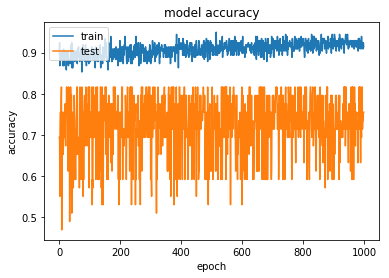

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

0


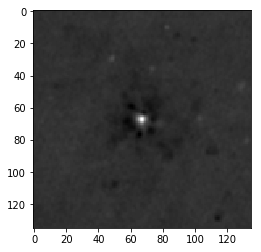

1


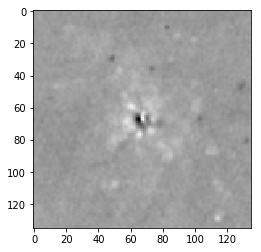

Dense to output layer weights [-4.85812378 -4.63383484]


In [30]:
for layer in model.layers:
    weights = layer.get_weights()

wt = np.reshape(weights[0], (135, 135, 2))
    
for n in range(0, wt.shape[2]):
   plt.imshow(wt[:,:,n], cmap='gray', shape=(135, 135))
   print (n)
   plt.show()

print ("Dense to output layer weights " + str(weights[1]))